In [1]:
#This code uses a page-rank algorithm to compute import themes - i.e. finding links to common words across various topics

import re
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections
from nltk.collocations import *
import nltk.draw
import string
import re
import nltk
import glob
from nltk.corpus import stopwords
from datetime import datetime
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
#for ipython
%matplotlib notebook

In [56]:
allFiles = glob.glob("Fintech/Retail_Banks/*.csv")
#allFiles = glob.glob("Uk_J*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df0 = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df0)
df = pd.concat(list_)

In [57]:
df0 = df[df.status_message.str.contains("http") == False]
#df1 = df0[df0.status_message.str.contains(".com") == False]

tweets = list(df0.status_message.drop_duplicates())
tknzr = TweetTokenizer()
tokens = tknzr.tokenize(str(tweets).translate(None, string.punctuation))

In [62]:
stop = stopwords.words('english')
stop += ['rt','im', 'thats', '.' , \
        ',', '?', '!']
#stop += ['barclays', 'hsbc', 'lloyds', 'halifax', 'natwest', 'metro', 'wells', 'bank', 'account']
#stop += ['wells', 'fargo', 'wellsfargo', 'pnc', 'suntrust', 'pnc', 'çapital one']
#stop += ['scotiabank', 'royal', 'national', 'cibc', 'bmo', 'tangerine']
#stop += ['apple pay', 'btc', 'apple', 'bitcoin', 'kabbage', 'fundrise', 'crowdstreet', 'zopa', 'ratesetter', \
#        'sofi', 'commonbond', 'lendzoan', 'property', 'bitcoin', 'getmoven', 'mint', 'paypal', 'transferwise' \
#        'ally', 'synchrony', 'discover', 'simple', 'bank5connect', 'sainsburys', 'sainsbury', 'ms', 'tesco']
#stop += ['bank', 'banking', 'account']
tweet_texts_processed = [i.lower().encode('ascii', 'ignore') for i in tokens if i.lower() not in stop]

In [63]:
tags = nltk.pos_tag(tweet_texts_processed)
nouns = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]

In [ ]:
textNLTK=nltk.text.ContextIndex(nouns)
#topics = ['account',  'apple', 'service', 'mobile', 'money', 'app', 'safe', 'machine', 'tech', 'smart', 'online',\
#          'trust', 'technology', 'payment', 'card', 'secure']
topics = ['funding',  'kabbage', 'lendinvest', 'lendio', 'ondeck', 'prosper', 'ratesetter', 'zopa', \
          'paydayloan', 'marketinvoice', 'crowdstreet',\
          'fundrise', 'lendinghome', 'lendzoan', 'prodigynetwork', 'propertycrowd', 'realpartner', 'realcrowd', \
         'bitcoin', 'cryptocurrency', 'currencycloud', 'blockchain', 'getmoven', 'paypal', 'transferwise', \
         'applepay', 'samsungpay', 'allybank', 'synchrony', 'bank5connect', 'rbc', 'rabo']

nodeEdges={x:textNLTK.similar_words(x) for x in topics} #dictionary of nodes and edges

nodeEdges = {k:v for k,v in nodeEdges.items() if v}

topicfinal = nodeEdges.keys()
edges= [(x,y) for x in topicfinal for y in nodeEdges[x]]

In [ ]:
G=nx.Graph()
G.add_nodes_from(topics)
G.add_edges_from(edges)

In [ ]:
pageRank=nx.pagerank(G)
d = collections.Counter(pageRank)
themes = [x for x in d.most_common(100) if x[0] not in topicfinal]

In [ ]:
df = pd.DataFrame(themes[1:50], columns=['Topic', 'PageRank'])
df.plot(x='Topic',y='PageRank',kind='bar')
plt.tight_layout()
plt.show()

In [ ]:
###############

In [36]:
#str1 = ' '.join(nouns)

In [64]:
freq_nouns=nltk.FreqDist(nouns)

In [27]:
#freqnouns = [x[0] for x in freq_nouns.most_common(1000)]

In [28]:
#str1 = ' '.join(freqnouns)

In [ ]:
#WordCloud.generate_from_frequencies()
#wordcloud = WordCloud(
#                      max_words=1515,
#                      background_color='black',
#                      width=3500,
#                      height=2000,
#                      margin=10,random_state=1
#                     ).generate(str1)
#plt.imshow(wordcloud)
#plt.axis('off')
#plt.tight_layout()
#plt.show()


<IPython.core.display.Javascript object>


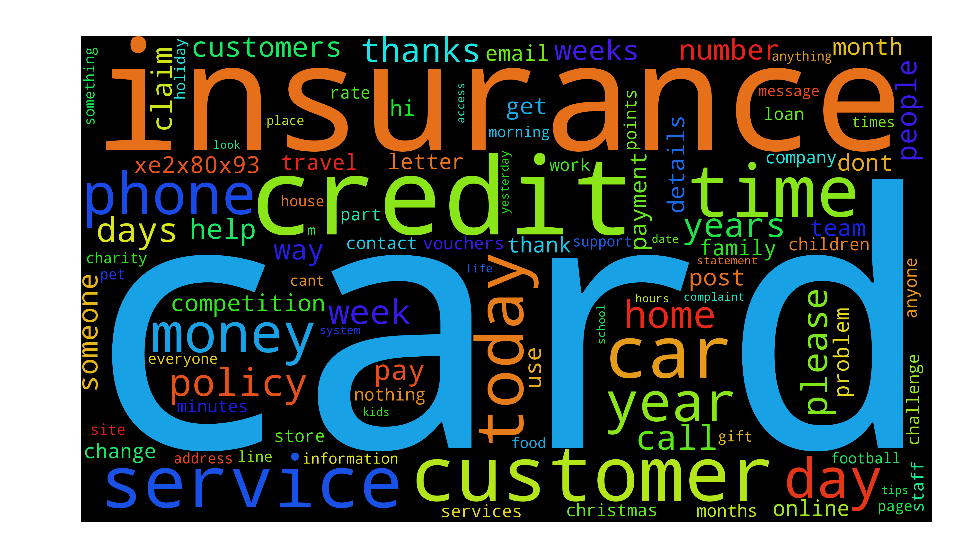

In [65]:
wordcloud = WordCloud(
                      background_color='black',
                      width=3500,
                      height=2000,
                      margin=10,random_state=1
                     ).generate_from_frequencies(freq_nouns.most_common(100))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()
